# '왼손 타자는 왼손 투수에게 약하다.' 속설 검증

야구계에서는 '왼손 타자는 왼손 투수에게 약하다.' 라는 속설이 있다.
이 속설이 정말 그러한지 확인해보고자 한다.

(왼손 투수, 왼손 타자),(오른손 투수, 왼손 타자) 타자의 강함을 비교하여 왼손 타자는 왼손 투수에게 약한지 확인한다. 
<!-- ,(왼손 투수, 오른손 타자),(오른손 투수, 오른손 타자) -->
강함의 척도는 타자를 평가하는 척도인 안타율을 가지고 비교한다.  


## 차례
1. statiz 웹 페이지 구조
2. 웹 크롤링 코드
3. 데이터 분석



## 1. statiz 웹 페이지


(왼손 투수, 왼손 타자),(오른손 투수, 왼손 타자)의 안타율을 알기 위해서는 타수별로 어느손 투수가 어느손 타자를 상대했고 어떤 결과가 나왔는지 필요하다.  

http://www.statiz.co.kr/ 는 경기에서 어느 타자가 어느 투수랑 상대했고 결과가 어떤지 타석별로 아래와 같이 정리되어 있다.

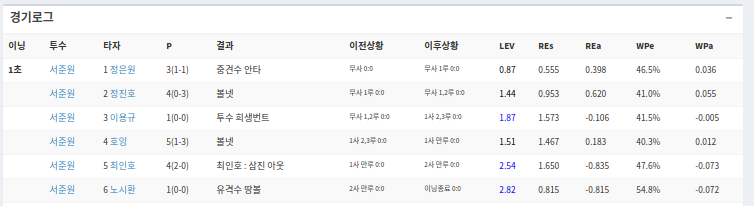

선수의 손 방향은 선수 이름이 있는 url로 들어가 찾을 수 있고,

타석마다 타자가 어느쪽에 섰는지에 대한 데이터는 없어 좌타자는 왼쪽에 우타자는 오른쪽에 섰다고 한다.

이 테이블은 2014년부터 있으며, 날짜별 경기 페이지의 경기 로그에 있다.

2014년부터 2020년까지 KBO 정규리그를 가져오겠다.


### 1-1. 필요로 하는 데이터까지 가는 과정

http://www.statiz.co.kr/main.php 은 웹 페이지의 메인 url 이다.  
statiz 웹 페이지에서는 아래와 같은 목록을 가지고 있다.
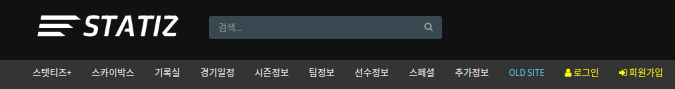

경기 목록으로 들어가면 아래와 같이 KBO 리그 일정이 1982년 3월부터 현재까지 있다.  

메인 url에서 http://www.statiz.co.kr/schedule.php?opt={달}&sy={연도} 와 같이 url을 바꿔주면 해당 달, 연도에 경기일정을 웹 페이지를 얻는다.  

http://www.statiz.co.kr/schedule.php?opt=0&sy=2020 와 같이 달 부분에 0을 넣게 되면 해당 연도에서 가장 최근 달의 일정으로 가게 된다.

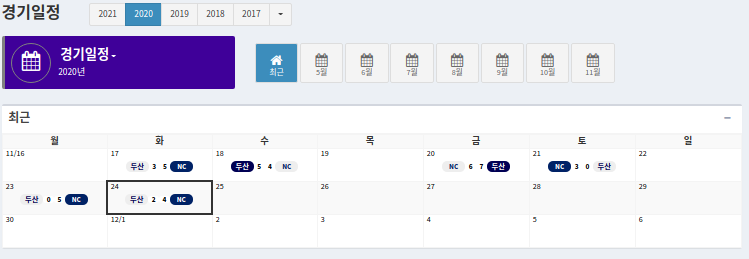

그 해에 경기가 있는 달을 나타내는 태그는 아래와 같이 있다.  
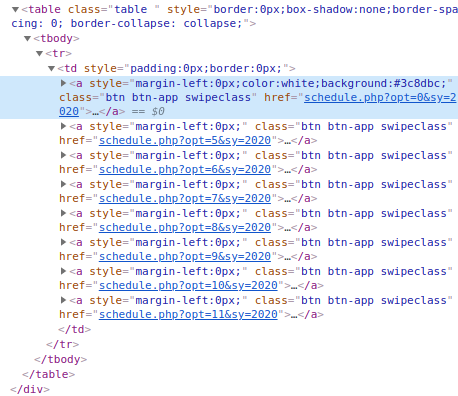

아래는 한 경기를 나타내는 부분의 태그이다.  
경기마다 그 경기의 자세한 기록을 볼 수 있는 url을 가지고 있다.

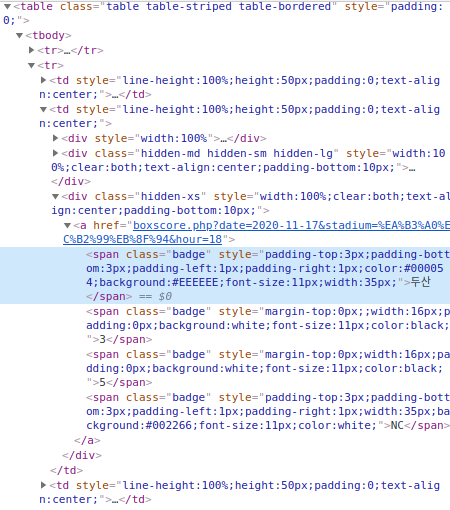

이 url로 들어가게 되면 경기요약 페이지가 나온다.  

경기 요약은  
2013년까지는 이닝별 점수만 볼 수 있지만 2014년 일정부터 아래와 같이 자세한 상황까지 적혀있다.

Ex) 2014년 7월 10일 두산 VS LG 경기:  
http://www.statiz.co.kr/boxscore.php?date=2014-07-10&stadium=%EC%9E%A0%EC%8B%A4&hour=18

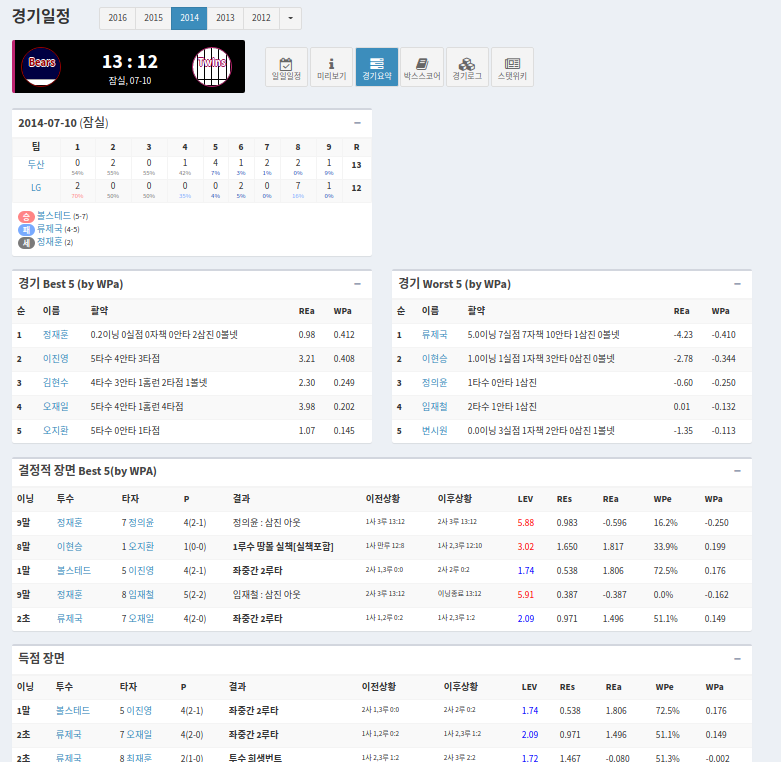


위 페이지 url에서 http://www.statiz.co.kr/boxscore.php? 뒤에 `opt=5&`를 추가로 넣어주면 경기로그 url이다.  

각 팀의 라인업과 선수별 포지션과 어느손으로 던지고 치는지 방향이 적혀있는 "투타"가 적혀있다. 
- 이 정보를 이용해서 경기로그 테이블에 나온 선수 이름과 매치해 선수의 방향을 안다.

경기로그 테이블에서는 타석별로 타자, 투수, 결과가 적혀있다.   

http://www.statiz.co.kr/boxscore.php?opt=5&date=2014-07-10&stadium=%EC%9E%A0%EC%8B%A4&hour=18

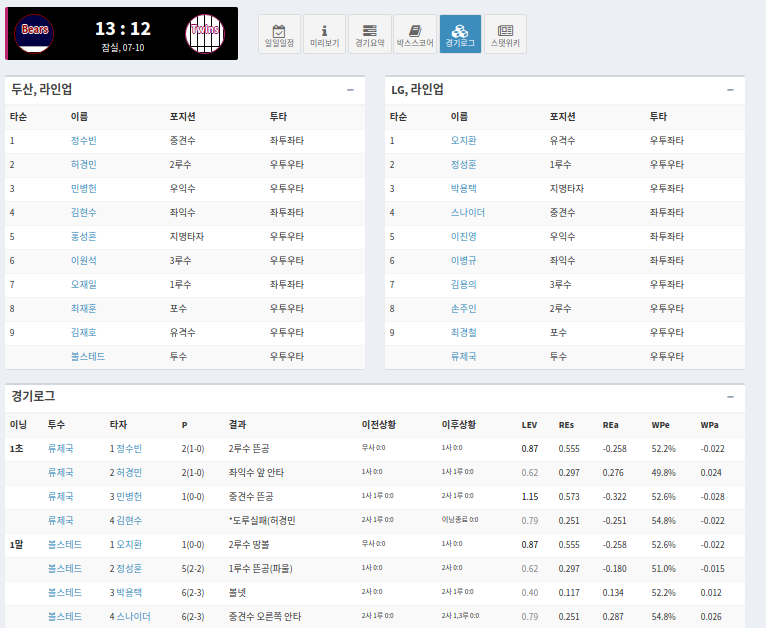

위에 라인업 표와 경기로그 표는 아래와 같이 `<div class="col-xs-12 col-sm-6">` 태그 안에 있다.
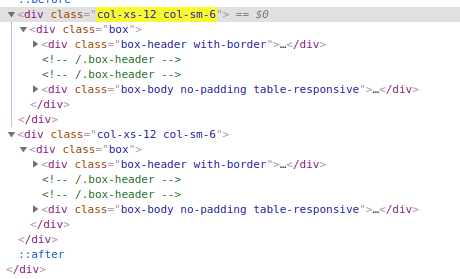

웹 페이지에서 아래와 같은 태그 안에 "투타"에 대한 정보가 있다.  
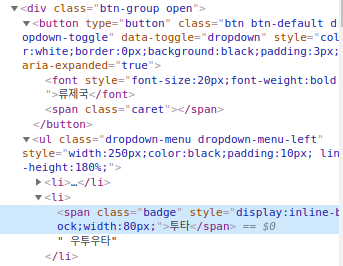

경기로그에 투수나 타자에는 투수, 투수의 선수정보를 얻을 수 있는 url이 있다.
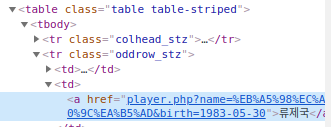

이 url로 들어가면 아래와 같이 선수 정보가 있다.

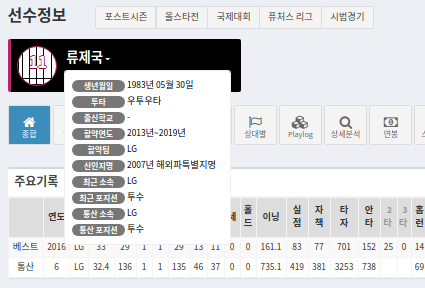



## 1-2 statiz 웹 페이지에서 데이터를 가져오는 순서
1. 경기 일정 url을 통해 년도별로 리그가 치루어진 월들의 url을 추출한다.
    - ex) http://www.statiz.co.kr/schedule.php?opt=0&sy=2020 에서 2020년에 경기가 치루어진 달의 url을 추출한다.


2. 월들의 url로 접속해 각 경기의 경기요약 페이지 url을 추출한다.
    - 페이지 url에 "opt=5&"을 추가해 경기로그 페이지 url로 바꾼다.
    
    
3. 각 팀당 라인업에서 선수별 "투타" 데이터와 경기로그에서 타석별 경기 로그를 추출한다.   


4. 라인업 이외에 새로 타석에 나온 투수, 타자가 있다면 선수의 url에 들어가 "투타"를 가져온다.  


5. 데이터를 타석별로 저장한다.

# 2. 웹 크롤링 코드

url에서 html 파일을 요청하고 BeautifulSoup 객체로 변환하는 과정이 많아 부모 클래스로 메쏘드 선언을 했다.


In [20]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from time import sleep
import re

class Basic:
    def __init__(self):
        pass
        
    
    def source(self,url):
        url=url
        html=urlopen(url)
        bs=BeautifulSoup(html,'lxml')
        return bs

아래는 원하는 구간의 연도(ex : 2014~2020)에서 몇월 몇월 경기가 치뤄졌는지 가져오고

경기가 있는 달에 있는 경기들의 경기요약 url을 가져온다.

In [77]:
class DateGame(Basic):
    def __init__(self):  # 시작하는 연도와 끝 연도를 받는다.
        self.fail_year=[]                     # 에러가 나서 데이터 추출이 실패한 부분을 저장
        self.fail_month=[]
        self.months_url=[]                    # 경기가 치뤄진 달의 url을 리스트에 담아 저장
        self.games_url=[]                         # 각 경기의 url을 리스트에 담아 저장
        

    def start(self,first_year, last_year):
        self.first_year=first_year      
        self.last_year=last_year
        
        temp_year=self.last_year-self.first_year
        print(temp_year+1,"년간 데이터")
        for i in range(temp_year+1):
            self.year_game=[]
            self.get_month(i)
            self.get_schedule()           
            self.save(self.first_year+i)                 #연도별로 경기 저장
            self.games_url+=self.year_game
        
    def get_month(self,add):                      # 경기가 치뤄진 달의 url을 추출하는 함수
        print(self.first_year+add,"년 데이터")
        try: 
            url='http://www.statiz.co.kr/schedule.php?opt=0&sy={}'.format(self.first_year+add)   # 연도별 최근 달 페이지로 이동
            bs=self.source(url)
            list_month = bs.find('td',{'style':'padding:0px;border:0px;'})                     # 해당 연도에 경기가 치뤄진 달들의 url을 가지는 태그를 얻는다

            for row in list_month.find_all('a')[1:]:
                temp=row.attrs['href']
                self.months_url.append(temp)             # 각 달의 url을 self.months_url에 저장
        except Exception as e:
            print(self.first_year+i,"년도 실패")          # 에러가 발생할시 어떤 에러인지 저장
            self.fail_year.append((self.first_year+add,e))

                
            
    def get_schedule(self):                                  # 달의 url을 받고 달에서 치뤄진 경기들의 url을 추출한다.
        url='http://www.statiz.co.kr/'
        total=len(self.months_url)
        num=0
        for row in self.months_url:
            num+=1
            temp=url+row
            print(total-num,"번째 ",temp)
            try:
                bs_month=self.source(temp)
                calendar=bs_month.find('table',{'class':'table table-striped table-bordered'})  # 달력에 태그를 찾는다
                days= calendar.findAll('div',{'class':'hidden-xs'})                             # 달력에서 일별 태그를 찾는다
                for games in days: 
                    for game in games.findAll('a',{'href': re.compile('^(boxscore)')}):         # 일에 치뤄진 각 경기의 url들을 추출한다.
                        vs_game=game.findAll('span')
                        if not vs_game[0].text in ['','서군','드림','나눔','북부','남부'] and re.compile('[0-9]').match(vs_game[1].text): # 오류와 정규시즌이 아닌 경기는 제외한다.
                            self.year_game.append(game.attrs['href'])

            except Exception as e:
                print("실패 : ",temp)
                self.fail_month.append((temp,e))
                
    def save(self,year):                                                      # 연도별 경기 url을 text 형식으로 저장한다.
        f=open("games_url{}.txt".format(year),'w')
        for row in self.year_game:
            f.write(row+'\n')
        f.close()


get_month는 연도에서 경기가 있는 달들의 url을 가져온다.

get_schedul는 달에 있는 경기들의 경기요약 url을 가져온다.

In [86]:
dategame=DateGame()
dategame.start(2018,2018)

1 년간 데이터
2018 년 데이터
8 번째  http://www.statiz.co.kr/schedule.php?opt=3&sy=2018
7 번째  http://www.statiz.co.kr/schedule.php?opt=4&sy=2018
6 번째  http://www.statiz.co.kr/schedule.php?opt=5&sy=2018
5 번째  http://www.statiz.co.kr/schedule.php?opt=6&sy=2018
4 번째  http://www.statiz.co.kr/schedule.php?opt=7&sy=2018
3 번째  http://www.statiz.co.kr/schedule.php?opt=8&sy=2018
2 번째  http://www.statiz.co.kr/schedule.php?opt=9&sy=2018
1 번째  http://www.statiz.co.kr/schedule.php?opt=10&sy=2018
0 번째  http://www.statiz.co.kr/schedule.php?opt=11&sy=2018


2018년을 예로 들어 위처럼 2018년에는 9달에 걸쳐 경기를 진행했고, 3~11월까지 경기가 치뤄졌다.

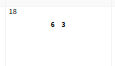

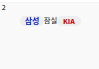
처럼 잘못 표기되어 있거나 이벤트, 친선경기 처럼 정규시즌이 아닌 것은 제외한다.

실패한 url

In [58]:
print(dategame.fail_month)

[]


In [59]:
print(dategame.fail_year)

[]


데이터 추출이 실패한 것이 있으면 그 연도를 클레스에 넣고 다시 실행시킨다.

추출 데이터

In [81]:
print(dategame.months_url)

['schedule.php?opt=3&sy=2018', 'schedule.php?opt=4&sy=2018', 'schedule.php?opt=5&sy=2018', 'schedule.php?opt=6&sy=2018', 'schedule.php?opt=7&sy=2018', 'schedule.php?opt=8&sy=2018', 'schedule.php?opt=9&sy=2018', 'schedule.php?opt=10&sy=2018', 'schedule.php?opt=11&sy=2018']


In [82]:
dategame.games_url

{'boxscore.php?date=2018-03-24&stadium=%EA%B3%A0%EC%B2%99%EB%8F%94&hour=14',
 'boxscore.php?date=2018-03-24&stadium=%EB%A7%88%EC%82%B0&hour=14',
 'boxscore.php?date=2018-03-24&stadium=%EC%9D%B8%EC%B2%9C%EB%AC%B8%ED%95%99&hour=14',
 'boxscore.php?date=2018-03-24&stadium=%EC%9E%A0%EC%8B%A4&hour=14',
 'boxscore.php?date=2018-03-24&stadium=%EC%B1%94%ED%94%BC%EC%96%B8%EC%8A%A4%ED%95%84%EB%93%9C&hour=14',
 'boxscore.php?date=2018-03-25&stadium=%EA%B3%A0%EC%B2%99%EB%8F%94&hour=14',
 'boxscore.php?date=2018-03-25&stadium=%EB%A7%88%EC%82%B0&hour=14',
 'boxscore.php?date=2018-03-25&stadium=%EC%9D%B8%EC%B2%9C%EB%AC%B8%ED%95%99&hour=14',
 'boxscore.php?date=2018-03-25&stadium=%EC%9E%A0%EC%8B%A4&hour=14',
 'boxscore.php?date=2018-03-25&stadium=%EC%B1%94%ED%94%BC%EC%96%B8%EC%8A%A4%ED%95%84%EB%93%9C&hour=14',
 'boxscore.php?date=2018-03-27&stadium=%EA%B3%A0%EC%B2%99%EB%8F%94&hour=18',
 'boxscore.php?date=2018-03-27&stadium=%EB%A7%88%EC%82%B0&hour=18',
 'boxscore.php?date=2018-03-27&stadium=%EC%9D%B8%

In [85]:
print(len(dategame.games_url))

732


2014년까지는 9팀, 팀당 128경기 총 576경기 + 가을야구  
그 이후는 10팀, 팀당 144경기 총 720 + 가을야구  
2018년에는 가을야구가 총 16번 있어 dategame.games_url의 길이가 736이다.  

가을야구 수 {2014:16, 2015,15, 2016:34, 2017:15, 2018:16, 2019:12, 2020:13}

아래 코드는 각 경기url에서 데이터를 가져오는 코드이다.

라인업에서 투수와 타자의 방향을 딕셔너리 형태로 저장  


딕셔너리에 저장된 사람이 타석에 나오면 꺼내서 쓴다.  
딕셔너리없는 선수일 경우 선수의 url로 들어가 방향정보를 추출한다.

In [193]:
class Player(Basic):
    def __init__(self,years):
        self.date_game=pd.DataFrame([],columns=['pitcher','p_side','batter','b_side','p','result','url']) 
                                                # 투수 이름, 투수 방향, 타자 이름, 타자 방향, 스트라이크 볼, 결과, 경기 url
        self.years=years
        self.fail=[]

    def findtable(self,urls):
        temp='http://www.statiz.co.kr/'

        for i, url in enumerate(urls):
            try:
                now=temp+url[:13]+'opt=5&'+url[13:]      # 경기요약 페이지를 경기로그 페이지로 바꿔준다.
                print(len(urls)-i,'번 ',now)
                bs=self.source(now)

                player_pitcher={}
                player_batter={}


                lineups=bs.find_all("table",{"class":"table table-striped"})[0:2]   #선수 라인업이 있는 테이블을 찾는다.

                for one_lineup in lineups:                      # 라인업에서 선수들의 정보를 가져온다.
                    for row in one_lineup.findAll('tr')[1:-1]:  
                        one_player=row.find_all('td')[1].text
                        one_side=row.find_all('td')[3].text
                        player_batter[one_player]=one_side     # 타자는 타자별 투수는 투수별로 따로 저장한다.

                    pic_line=one_lineup.findAll('tr')[-1]
                    one_player=pic_line.find_all('td')[1].text
                    one_side=pic_line.find_all('td')[3].text
                    player_pitcher[one_player]=one_side
    #             print(player_batter)
    #             print(player_pitcher)

                table=bs.find_all("table",{"class":"table table-striped"})[2].find_all('tr')  # 타석의 정보가 있는 로그의 테이블을 찾는다.
            
            except:
                (len(urls)-i,'번 ',now)
                self.fail.append(['경기',len(urls)-i,now])           # 경기에 데이터를 못가져왔을때  self.fail에 저장한다.
                
            else : 
                for j,row in enumerate(table[1:]):           # "이닝","타자", 처럼 열 속성이 적혀 있는 부분을 제외시킨다.
                    try:
    #                     print('세부 ',len(table)-j ,'번')
                        line=row.findAll('td')[1:5]          # 데이터들이 담겨진 태그를 데이터 속별로 나눈다.(타자, 투수, 결과....)
                        pitcher,batter,p,result=line
                        pitcher=pitcher.text
                        batter= batter.a.text
                        p=p.text
                        result=result.text
                        
                        if pitcher!='':                  # 선수교체등 타석과 상관없는 데이터가 적혀있는 것은 무시한다.
                            if not player_pitcher.get(pitcher,False):    # 선수의 방향데이터가 없으면 실행
                                side=self.crawl(line[0].a.attrs['href']) # 선수의 방향 데이터를 추출하는 함수를 호출한다.
                                player_pitcher[pitcher]=side         

                            if not player_batter.get(batter,False):
                                side=self.crawl(line[1].a.attrs['href'])
                                if side=='':             # 선수 방향이 없다면 error를 일으킨다.
                                    raise error
                                player_batter[batter]=side

        #                     print({'pitcher':pitcher,'p_side':player_pitcher[pitcher],'batter':batter,'b_side':player_batter[batter],'p':p,'result':result,'url':url})
                            self.date_game=self.date_game.append({'pitcher':pitcher,'p_side':player_pitcher[pitcher],'batter':batter,'b_side':player_batter[batter],'p':p,'result':result,'url':url},ignore_index=True)
                    except:
                        self.fail.append(['이닝' ,len(table)-j,line ,url])  # 타석의 대한 데이터를 못찾았을때  self.fail에 저장한다.

            self.save()
    
    def crawl(self,url):                    # 선수의 url로 들어가 방향을 가져온다.
        url='http://www.statiz.co.kr/'+url
        bs=self.source(url)
        profile = bs.find("ul",{"class":"dropdown-menu dropdown-menu-left"})
        side=profile.findAll('li')[1].text[3:]
        return side

        
    
    def save(self):
        self.date_game.to_excel("baseball_date{}_temp.xlsx".format(self.years),index=False)   #연도에 맞게 저장한다.

In [71]:
player=Player("2018")
player.findtable(dategame.games_url[-80:-60])

20 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=14
19 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EB%B6%80%EC%82%B0%EC%82%AC%EC%A7%81&hour=14
18 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EC%9E%A0%EC%8B%A4&hour=14
17 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EC%BC%80%EC%9D%B4%ED%8B%B0%EC%9C%84%EC%A6%88%ED%8C%8C%ED%81%AC&hour=14
16 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EC%9D%B8%EC%B2%9C%EB%AC%B8%ED%95%99&hour=18
15 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-26&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=14
14 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-26&stadium=%EB%B6%80%EC%82%B0%EC%82%AC%EC%A7%81&hour=14
13 번  http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-26&stadium=%EC%9D%B8%EC%B2%9C%EB%AC%B8%ED%95%99&hour=14
12 번  http://www.statiz.co.kr/boxscore.php?opt=

위 과정을 연도별로 다른 jupyter 파일을 키고 멀티로 실행했다.

추출이 실패한 데이터는 아래와 같이 나오게 된다.

현재 2014~2020년 경기 로그를 가져온 결과  

'이닝'은 타자 url에서 방향 데이터가 없는 경우  
'경기'는 경기 데이터가 적혀있지 않은 경우이다.  

ex)  
http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=14

경기 데이터가 없는 경우는 데이터 추출에서 제외했다. 

In [72]:
for i in player.fail:
    print(i)
    print()

['경기', 20, 'http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=14']

['이닝', 31, [<td><a href="player.php?name=%EA%B0%95%EC%9C%A4%EA%B5%AC&amp;birth=1990-07-10">강윤구</a></td>, <td>6 <a href="player.php?name=%EB%82%98%EC%A2%85%EB%8D%95&amp;birth=1998-03-16">나종덕</a></td>, <td>6(2-3)</td>, <td style="text-align:left"><span onclick='setPopup("popup/playlog.php?date=2018-09-25&amp;stadium=%EB%B6%80%EC%82%B0%EC%82%AC%EC%A7%81&amp;hour=14&amp;res=565&amp;flag=1", this);' style="cursor:pointer">나종덕 : 삼진 아웃</span></td>], 'boxscore.php?date=2018-09-25&stadium=%EB%B6%80%EC%82%B0%EC%82%AC%EC%A7%81&hour=14']

['경기', 16, 'http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EC%9D%B8%EC%B2%9C%EB%AC%B8%ED%95%99&hour=18']

['이닝', 38, [<td><a href="player.php?name=%EA%B6%8C%EC%98%A4%EC%A4%80&amp;birth=1980-03-09">권오준</a></td>, <td>6 <a href="player.php?name=%EA%B9%80%ED%83%9C%EA%B7%A0&amp;birth=1982-05-29">김태균</a></td>, <td>10(2-2)</

In [73]:
player.fail[0][2]

'http://www.statiz.co.kr/boxscore.php?opt=5&date=2018-09-25&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=14'

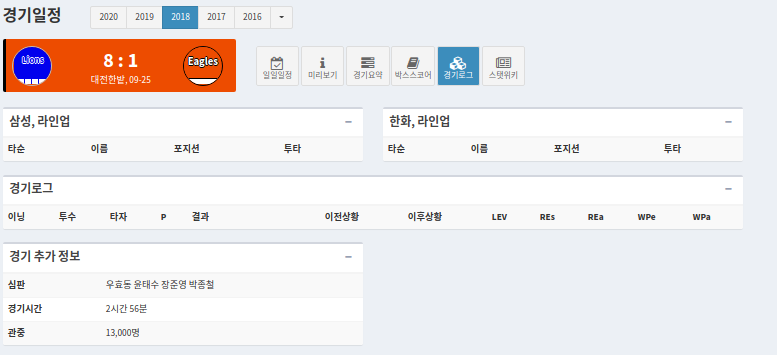


'김태균' 타자는 치는 방향을 나타내는 '타투'가 없다.  
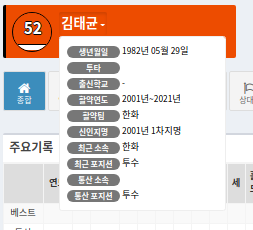

'나종덕' 타자에 대한 데이터가 아래와 같이 존재하지 않는다.

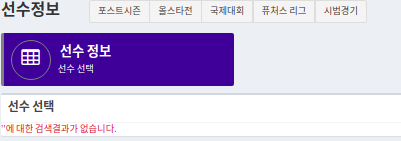

데이터가 없는 타자에 대한 방향 데이터를 KBO 공식 페이지의 https://www.koreabaseball.com/Player/Search.aspx 에서 검색한 뒤 넣어주었다.

KBO 공식 페이지 페이지에서도 타자의 "투타" 데이터가 없는 것은 비교에서 제외시켰다.('이대형','강구성')

아래는 실패한 리스트에서 빠진 타자의 "투타"를 넣어주는 코드이다.

In [77]:
temp_date=[]
fail=[]
for i in player.fail:
    if i[0]=='이닝':
        player_batter=''
        line=i[2]
        pitcher,batter,p,result=line
        pitcher=pitcher.text
        batter= batter.a.text
        p=p.text
        result=result.text
        side=player.crawl(line[0].a.attrs['href'])
        player_pitcher=side
        
        if batter in ['나종덕', '김태균']:   # 빠진 부분에 대해서 직접 입력
            player_batter='우투우타'
        if player_batter !='':
            temp_date.append({'pitcher':pitcher,'p_side':player_pitcher,'batter':batter,'b_side':player_batter,'p':p,'result':result,'url':i[3]})
        else :
            print("fail : ",i)
            fail.append(i)
print(temp_date)

[{'pitcher': '강윤구', 'p_side': '좌투좌타', 'batter': '나종덕', 'b_side': '우투우타', 'p': '6(2-3)', 'result': '나종덕 : 삼진 아웃', 'url': 'boxscore.php?date=2018-09-25&stadium=%EB%B6%80%EC%82%B0%EC%82%AC%EC%A7%81&hour=14'}, {'pitcher': '권오준', 'p_side': '우언우타', 'batter': '김태균', 'b_side': '우투우타', 'p': '10(2-2)', 'result': '중견수 안타', 'url': 'boxscore.php?date=2018-09-26&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=14'}, {'pitcher': '유희관', 'p_side': '좌투좌타', 'batter': '김태균', 'b_side': '우투우타', 'p': '2(1-0)', 'result': '1루수 병살타', 'url': 'boxscore.php?date=2018-09-27&stadium=%EB%8C%80%EC%A0%84%ED%95%9C%EB%B0%AD&hour=18'}, {'pitcher': '브리검', 'p_side': '우투우타', 'batter': '나종덕', 'b_side': '우투우타', 'p': '3(2-0)', 'result': '나종덕 : 삼진 아웃', 'url': 'boxscore.php?date=2018-09-28&stadium=%EA%B3%A0%EC%B2%99%EB%8F%94&hour=18'}, {'pitcher': '김상수', 'p_side': '우투우타', 'batter': '나종덕', 'b_side': '우투우타', 'p': '4(2-1)', 'result': '나종덕 : 삼진 아웃', 'url': 'boxscore.php?date=2018-09-28&stadium=%EA%B3%A0%EC%B2%99%EB%8F%94&hour=18'}]


In [ ]:
for i in temp_date:
    player.date_game=player.date_game.append(i,ignore_index=True)
    
player.save()

# 3. 데이터 분석
타수별 투수와 타자의 방향 데이터를 가지고 (왼손 투수, 왼손 타자),(오른손 투수, 왼손 타자)별로 나눈 다음 안타율을 비교하여 이 속설이 진실인지 확인한다.

안타율은 "안타"/"타수" 이다.

가져온 데이터의 "result" 에서 (안타)|(루타)|(홈런)이 포함된 것이 안타이며,  
(뜬공)|(땅볼)|(병살타)|(삼진)|(아웃)|(실책)|(야수선택)|(삼중살) 와 안타를 포함한 것이 타수이다.  
볼넷, 희생 번트, 타격 방해 등 나머지는 타수에 포함되지 않는다.

In [1]:
import pandas as pd

pd_2018= pd.read_excel('baseball_date{}.xlsx'.format(2018))
pd_2018

,pitcher,p_side,batter,b_side,p,result,url
0,로저스,우투우타,이용규,좌투좌타,3(2-0),이용규 : 삼진 아웃,boxscore.php?date=2018-03-24&stadium=%EA%B3%A0...
1,로저스,우투우타,양성우,우투좌타,4(1-2),중견수 뜬공,boxscore.php?date=2018-03-24&stadium=%EA%B3%A0...
2,로저스,우투우타,송광민,우투우타,1(0-0),좌익수 안타,boxscore.php?date=2018-03-24&stadium=%EA%B3%A0...
3,로저스,우투우타,김태균,우투우타,3(0-2),우익수 안타,boxscore.php?date=2018-03-24&stadium=%EA%B3%A0...
4,로저스,우투우타,하주석,우투좌타,4(2-1),좌익수 안타,boxscore.php?date=2018-03-24&stadium=%EA%B3%A0...
...,...,...,...,...,...,...,...
60264,김상수,우투우타,나종덕,우투우타,4(2-1),나종덕 : 삼진 아웃,boxscore.php?date=2018-09-28&stadium=%EA%B3%A0...
60265,엄상백,우언우타,나종덕,우투우타,5(2-2),나종덕 : 삼진 아웃,boxscore.php?date=2018-09-30&stadium=%EC%BC%80...
60266,이승진,우투우타,나종덕,우투우타,5(1-3),볼넷,boxscore.php?date=2018-10-02&stadium=%EC%9D%B8...
60267,이종혁,우투우타,나종덕,우투우타,1(0-0),3루수 땅볼,boxscore.php?date=2018-10-10&stadium=%EB%B6%80...


아래 함수는 타자, 투수의 방향별 안타율을 구하는데 필요없는 부분을 버리고 계산하기 편하게 데이터를 가공한다.  

In [2]:
import re
def get_pd(pd):
    pd_drop=pd   
    pd_drop=pd_drop.drop(['pitcher','batter','p','url'],axis=1) 
    pd_drop = pd_drop.dropna(subset=['b_side'])
    pd_drop= pd_drop.replace(re.compile('.*((안타)|(루타)|(홈런)).*'),1)
    pd_drop= pd_drop.replace(re.compile('.*((뜬공)|(땅볼)|(병살타)|(삼진)|(아웃)|(실책)|(야수선택)|(삼중살)).*'),0)
    pd_drop=pd_drop.loc[(pd_drop['result'] == 0) | (pd_drop['result'] ==1)]
    return pd_drop

4행에서 가지고 있는 pandas 객체에서 안타율을 구하는데 필요없는 부분인 'pitcher','batter','p','url' 을 버린다.  

5행에서 아래 표와 같이 방향이 없는 타자는 제외한다.   ('이대형','강구성')

6~7행에서 result를 '안타','아웃'을 나타내는 1,0으로 바꾼다.

8행에서 result에서 안타는 1, 아웃은 0 으로 바꾼뒤 1과 0이 아닌것은 제외한다.

In [220]:
pd_2018[pd_2018['b_side'].isnull()]

,pitcher,p_side,batter,b_side,p,result,url
22758,우규민,우언우타,강구성,NaN,5(2-2),강구성 : 삼진 아웃,boxscore.php?date=2018-06-02&stadium=%EB%A7%88...
23182,최충연,우투우타,강구성,NaN,1(0-0),우익수 2루타,boxscore.php?date=2018-06-03&stadium=%EB%A7%88...
23200,심창민,우언우타,강구성,NaN,6(2-2),강구성 : 삼진 아웃,boxscore.php?date=2018-06-03&stadium=%EB%A7%88...
23705,구승민,우투우타,강구성,NaN,3(2-0),강구성 : 삼진 아웃,boxscore.php?date=2018-06-05&stadium=%EB%A7%88...
32947,이동현,우투우타,강구성,NaN,3(2-0),2루수 땅볼,boxscore.php?date=2018-07-04&stadium=%EC%9E%A0...


결과

In [108]:
g_pd=get_pd(pd_2018)
g_pd

,p_side,b_side,result
0,우투우타,좌투좌타,0
1,우투우타,우투좌타,0
2,우투우타,우투우타,1
3,우투우타,우투우타,1
4,우투우타,우투좌타,1
...,...,...,...
60262,좌투좌타,우투우타,0
60263,우투우타,우투우타,0
60264,우투우타,우투우타,0
60265,우언우타,우투우타,0


투수는 '우언','우투','좌언','좌투'가 있고 이것을 각 방향으로 바꿔준다.
- '언'은 언더핸드의 약자이다.

타자는 '우타','우투우,'좌투우','좌타','좌투좌','우투좌','양타'라고 써져 있으며 이도 각 방향에 맞춰 바꾼다.

'양타'는 어느방향으로 쳤는지 명확하지 않으므로 제외시켰다.

In [105]:
import numpy as np
def side_pd(pd):
    pd_side=pd
    pd_side['p_side']= pd_side['p_side'].replace(re.compile('.*(우언|우투).*'),'right')
    pd_side['p_side']= pd_side['p_side'].replace(re.compile('.*(좌언|좌투).*'),'left')
    pd_side['b_side']= pd_side['b_side'].replace(re.compile('.*(좌타|좌투좌|우투좌).*'),'right')
    pd_side['b_side']= pd_side['b_side'].replace(re.compile('.*(우타|우투우|좌투우).*'),'left')
#     pd_side['b_side']= pd_side['b_side'].replace(re.compile('.*(언).*'),np.NAN)
    
    pd_side['b_side']= pd_side['b_side'].replace(re.compile('.*(양타).*'),np.NAN)
    pd_side = pd_side.dropna(subset=['b_side'])
    
#     pd_side=pd_side.sort_values(by=['p_side','b_side'])
    return pd_side

4\~7행은 각자 방향에 맞게 방향을 입력해준다.  
9\~10행은 양타를 제거해준다

In [109]:
s_pd=side_pd(g_pd)
print(s_pd)

      p_side b_side result
0      right  right      0
1      right  right      0
2      right   left      1
3      right   left      1
4      right  right      1
...      ...    ...    ...
60262   left   left      0
60263  right   left      0
60264  right   left      0
60265  right   left      0
60267  right   left      0

[50899 rows x 3 columns]


타자, 투수별 방향에 맞춰서 묶어준다.

In [107]:
def group_pd(pd):
    gro_pd=pd.groupby(['p_side',"b_side"])
    return gro_pd

In [110]:
gro_pd=group_pd(s_pd)
for row in gro_pd:
    print(row[0])    
    print()
    print(row[1])
    print('-'*30)

('left', 'left')

      p_side b_side result
53      left   left      1
63      left   left      0
87      left   left      0
94      left   left      1
97      left   left      0
...      ...    ...    ...
60256   left   left      0
60259   left   left      0
60260   left   left      0
60261   left   left      0
60262   left   left      0

[7777 rows x 3 columns]
------------------------------
('left', 'right')

      p_side b_side result
52      left  right      0
54      left  right      0
62      left  right      0
86      left  right      0
88      left  right      0
...      ...    ...    ...
60235   left  right      1
60236   left  right      0
60240   left  right      0
60250   left  right      0
60257   left  right      1

[5487 rows x 3 columns]
------------------------------
('right', 'left')

      p_side b_side result
2      right   left      1
3      right   left      1
5      right   left      0
7      right   left      0
8      right   left      0
...      ...    ...   

In [102]:
def prob(gro_pd):
    pro={}
    for one_group in gro_pd:
        name=one_group[0]
        num_pd=len(one_group[1])
        hit=one_group[1]['result'].sum()
        
        pro[name]=hit/num_pd

    return pro

In [111]:
prob(gro_pd)

{('left', 'left'): 0.28867172431528865,
 ('left', 'right'): 0.2890468379806816,
 ('right', 'left'): 0.2755240947454397,
 ('right', 'right'): 0.2915945374110406}

아래는 위 과정을 한번에 실행하주는 함수이다.

In [104]:
def make_pro(pd):
    
    g_pd=get_pd(pd)
    s_pd=side_pd(g_pd)
    gro_pd=group_pd(s_pd)
    dict_pro=prob(gro_pd)

    
    return dict_pro 

In [112]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from matplotlib import pyplot as plt

total_dict_pd={}
pd_year={}

n=10
for year in range(2014,2021):
    pd_year[year]= pd.read_excel('baseball_date{}.xlsx'.format(str(year))) # 각 연도별로 저장된 엑셀에서 데이터를 꺼낸다.
    
#     total_dict_pd[year]=make_pro(pd_year[year])       # 커낸 데이터를 위에 함수로 전처리한다.
        

pd_total=pd.concat(pd_year.values(), ignore_index=True) # 전체 연도의 방향별 데이터
total_pmf=make_pro(pd_total)                          # 전체 연도의 pmf 생성

12행에서 각 연도별로 저장된 타수별 데이터를 꺼내서 딕셔너리 형태로 key : 연도, value : 연도의 타수 데이터 로 저장한다.  
14행에서 make_pro함수를 사용해 안타율를 구한다.

17행은 2014~2020년 전체 데이터이다.

In [114]:
print(total_pmf[('right','right')],total_pmf[('right','left')])

0.28740397748738267 0.2741404797100758


위에는 ('left', 'left')와 ('right', 'left')만 비교한 것이다.

2014~2020년 KBO 리그에서 "왼손 타자"가 "왼손 투수"와 만났을 때 안타율이 "왼손 타자"가 "오른손 투수"와 만났을 때와 비교했을때 보다 크다.

야구의 속설인 '왼손 타자는 왼손 투수에게 약하다.'는 2014~2020년 KBO 리그에서 성립하지 않는다.
